In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


There are 4 features for iris in this library (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)) and 3 different class of iris. We will not visualize each feature vs. target using scatter plot.

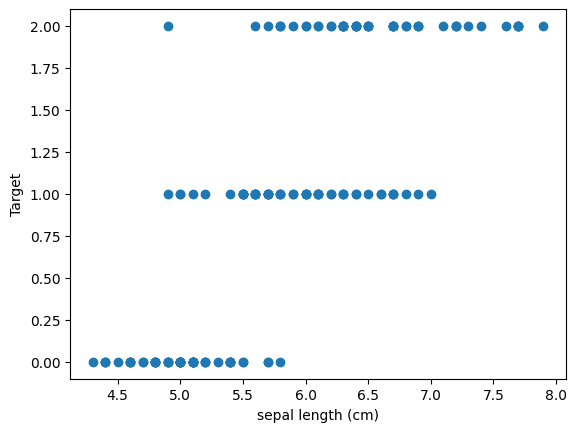

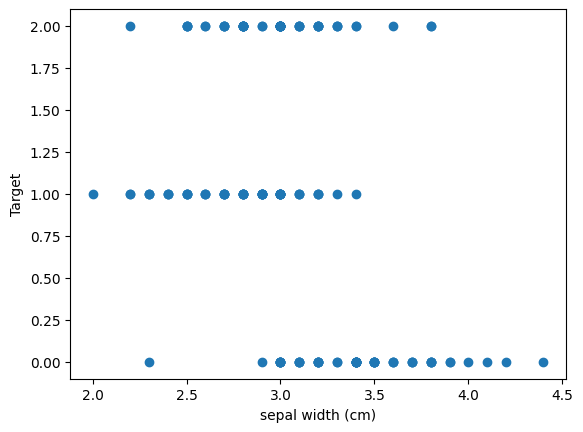

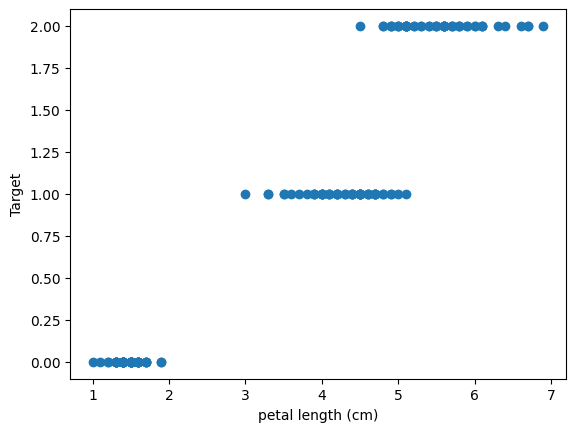

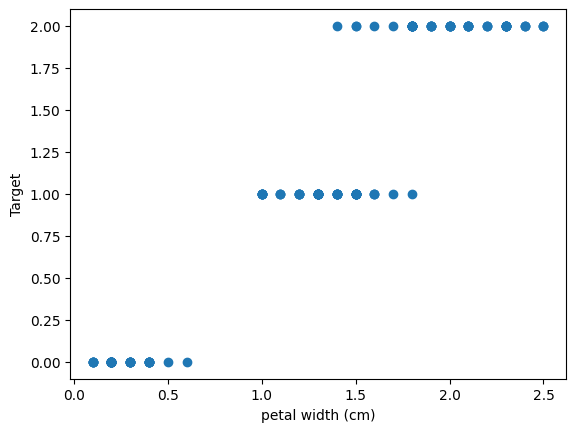

In [9]:
Y = df['target']
for feat in iris['feature_names']:
    X = df[feat]
    plt.scatter(X, Y)
    plt.xlabel(feat)
    plt.ylabel('Target')
    plt.show()

In [10]:
from sklearn.model_selection import train_test_split

features = df.drop(columns='target', axis=1)
labels = df.drop(columns=iris['feature_names'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=42, test_size=0.2)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

/Users/alejandro/Programming/Courses/EEC189G-Spring23/HW2/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/alejandro/Programming/Courses/EEC189G-Spring23/HW2/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: calculates the proportion of correctly classified instances out of all instances. It's the most common metric for classification problems.

precision_score: calculates the proportion of true positives (correctly classified instances that actually belong to the positive class) out of all instances classified as positive. It measures how precise the positive predictions are.

recall_score: calculates the proportion of true positives out of all instances that actually belong to the positive class. It measures how well the positive class is detected.

f1_score: calculates the harmonic mean of precision and recall. It's a balanced measure that takes into account both precision and recall.

mean_squared_error: calculates the average squared difference between the predicted and actual values. It's a common metric for regression problems.

r2_score: calculates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It's a common metric for regression problems.

confusion_matrix: creates a matrix that shows the number of true positives, true negatives, false positives, and false negatives. It's useful to visualize the performance of a classifier.

classification_report: creates a report that shows precision, recall, F1 score, and support (number of instances) for each class. It's useful to compare the performance of different classifiers.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report

accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='micro')
precision = precision_score(Y_test, y_pred, average='micro')
recall = recall_score(Y_test, y_pred, average='micro')
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
c_matrix = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f'{accuracy=}, {precision=}, {recall=}, {f1=}, {mse=}, {r2=}')

print(report)

print(f'Logistic Regression: Y = {clf.coef_}X + {clf.intercept_}')

accuracy=1.0, precision=1.0, recall=1.0, f1=1.0, mse=0.0, r2=1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Logistic Regression: Y = [[-0.39710519  0.96040005 -2.37445011 -1.00316159]
 [ 0.51257066 -0.25280601 -0.21507559 -0.76915118]
 [-0.11546546 -0.70759403  2.5895257   1.77231277]]X + [  9.03434554   1.840376   -10.87472154]


To interpret the coefficients of the logistic regression model, we need to exponentiate them to get the odds ratios. The odds ratio represents the factor by which the odds of the response variable increase with a unit increase in the predictor variable [3]. For example, if the odds ratio of a predictor variable is 2, it means that the odds of the response variable increase by a factor of 2 with a unit increase in the predictor variable.